# Turtles seightings

Marine Turtles	National Biodiversity Network Trust. Marine Turtles. National Biodiversity Network Trust, Newark, UK. https://doi.org/10.15468/fyt9hw, down

https://portal.obis.org/dataset/1cfc4d23-9fcd-42b2-95bf-9c4ee9bc50f6

### IMPORTANT: this can take some time to execute...

In [1]:
push!(LOAD_PATH,"C:/JMB/DIVAnd.jl/src","."); using DIVAnd;using PyPlot
#using NCDatasets
#using DataStructures
using Statistics
using DelimitedFiles
using LinearAlgebra
using Random

In [2]:
# Read the data retrieved from OBIS
AA=readdlm("./data/turtles.dat")
size(AA)

(2494, 2)

In [3]:
lon=AA[:,1]
lat=AA[:,2]
mean(lon),mean(lat)

(-6.812426180783882, 52.778528336383324)

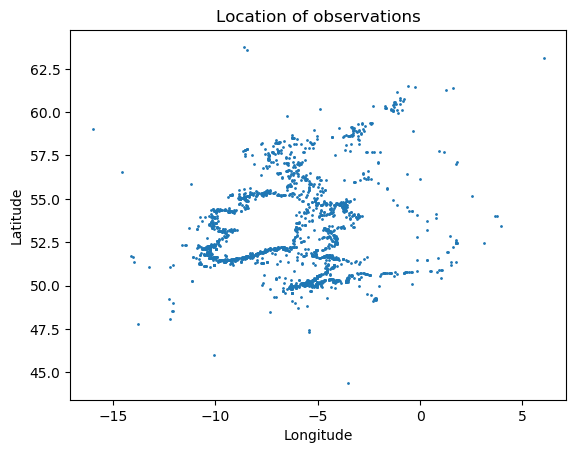

PyObject Text(0.5, 1.0, 'Location of observations')

In [4]:
scatter(lon,lat,s=1)
xlabel("Longitude")
ylabel("Latitude")
title("Location of observations")

## A simple heatmap without land mask

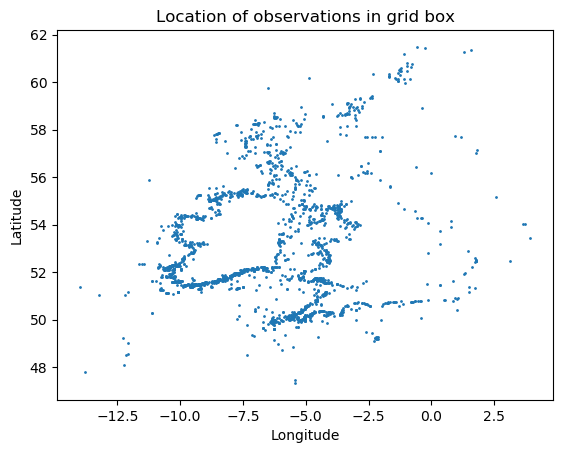

PyObject Text(0.5, 1.0, 'Location of observations in grid box')

In [5]:
NX=300
NY=250
# Box size
LX=18
LY=15
# Bounding box
xleft=-14
ybot=47
xright=xleft+LX
ytop=ybot+LY

xo=lon
yo=lat

# Eliminate points out of the box
sel=(xo.>xleft) .& (xo.<xright) .& (yo.>ybot) .& (yo.<ytop)

xo=xo[sel]
yo=yo[sel]
inflation=ones(size(xo))
scatter(xo,yo,s=1)
xlabel("Longitude")
ylabel("Latitude")
title("Location of observations in grid box")



### Heatmap

size(xi) = (300, 250)
177.231285 seconds (52.21 M allocations: 57.279 GiB, 2.45% gc time)

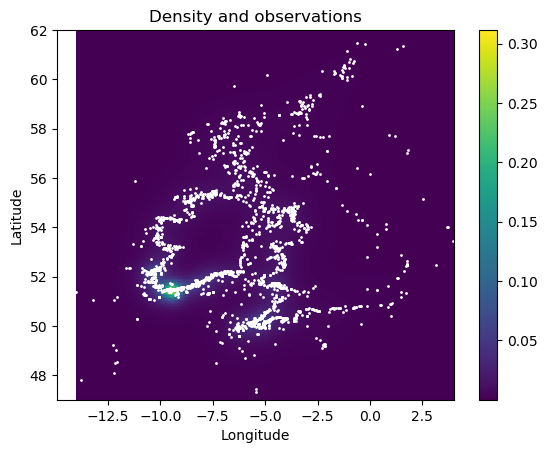


(LCV, LSCV, mean(LHM[1]), mean(LHM[2])) = (-3.66063815008583, -0.09520641398460697, 2.262294684745358, 1.9585274807125963)


(-3.66063815008583, -0.09520641398460697, 2.262294684745358, 1.9585274807125963)

In [6]:
dx=LX/(NX)
dy=LY/(NY)

xg = xleft+dx/2:dx:xleft+LX
yg = ybot+dy/2:dy:ybot+LY
# for pyplot
xp=xleft:dx:xleft+LX
yp = ybot:dy:ybot+LY
maskp,(pmp,pnp),(xip,yip) = DIVAnd.DIVAnd_rectdom(xp,yp)

mask,(pm,pn),(xi,yi) = DIVAnd.DIVAnd_rectdom(xg,yg)


# adding a mask
#mask[(xi.+0.25)./0.95 .+ (yi.-2.4)./1.1 .<1 ].=false
#mask[2*xi.+yi .<3.4 ].=false

@show size(xi)
# From here generic approach 
@time dens1,LHM,LCV,LSCV= DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0;Ladaptiveiterations=1)

figure()
pcolor(xip,yip,dens1),colorbar()
scatter(xo,yo,s=1,c="white")
xlabel("Longitude")
ylabel("Latitude")
title("Density and observations")
@show LCV,LSCV,mean(LHM[1]),mean(LHM[2])

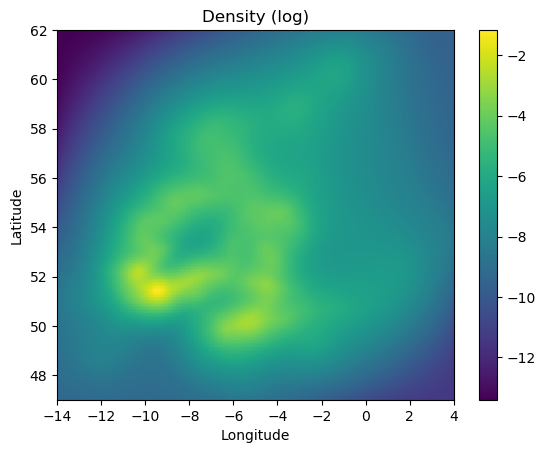

PyObject Text(0.5, 1.0, 'Density (log)')

In [7]:
figure()
pcolor(xip,yip,log.(dens1)),colorbar()
xlabel("Longitude")
ylabel("Latitude")
title("Density (log)")

## Now prepare land mask

In [8]:
bathname = "c:/JMB/divand.jl/examples/gebco_30sec_4.nc"

if !isfile(bathname)
    download("https://b2drop.eudat.eu/s/ACcxUEZZi6a4ziR/download",bathname)
else
    @info("Bathymetry file already downloaded")
end

┌ Info: Bathymetry file already downloaded
└ @ Main In[8]:6


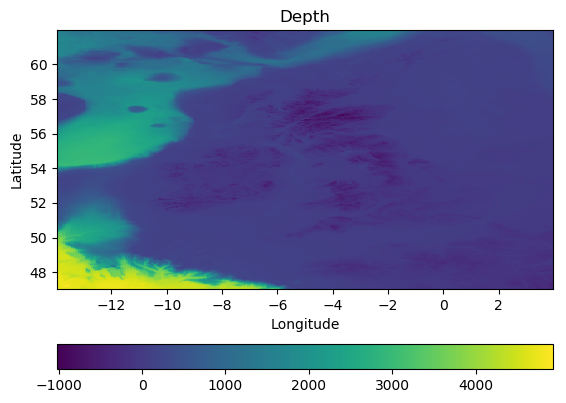

size(b) = (300, 250)


(300, 250)

In [9]:
bx,by,b = load_bath(bathname,true,xg,yg)

pcolor(bx,by,b'); colorbar(orientation="horizontal")
xlabel("Longitude")
ylabel("Latitude")
title("Depth")

@show size(b)

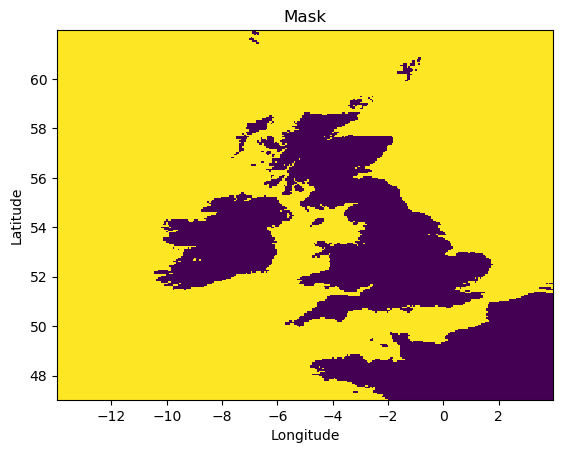

PyObject Text(0.5, 1.0, 'Mask')

In [10]:
  for j = 1:size(b,2)
        for i = 1:size(b,1)
            mask[i,j] = b[i,j] >= 0
        end
    end
pcolor(bx,by,Float64.(mask)')
xlabel("Longitude")
ylabel("Latitude")
title("Mask")

### First heatmap with uniform and automatic bandwidth

 45.888458 seconds (227.47 k allocations: 22.831 GiB, 2.46% gc time)


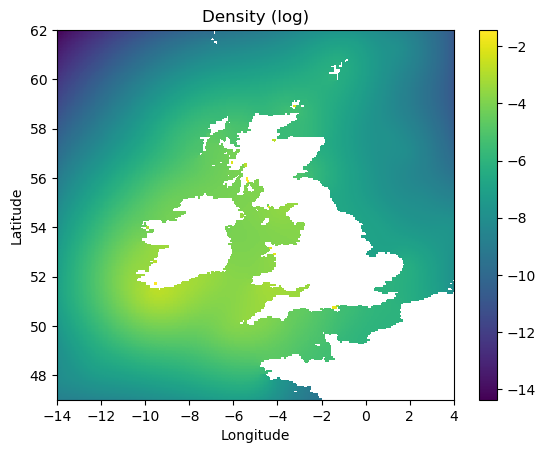

(LCV, LSCV, mean(LHM[1]), mean(LHM[2])) = (-4.476932850384755, -0.025855089500647046, 0.7492269243006295, 0.648625278761032)


(-4.476932850384755, -0.025855089500647046, 0.7492269243006295, 0.648625278761032)

In [11]:
@time dens1,LHM,LCV,LSCV= DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0;Ladaptiveiterations=0)

figure()
pcolor(xip,yip,log.(dens1)),colorbar()
xlabel("Longitude")
ylabel("Latitude")
#scatter(xo,yo,s=1,c="white")
title("Density (log)")
@show LCV,LSCV,mean(LHM[1]),mean(LHM[2])

## Now with adapted bandwidth

 94.062434 seconds (448.46 k allocations: 45.671 GiB, 2.37% gc time)


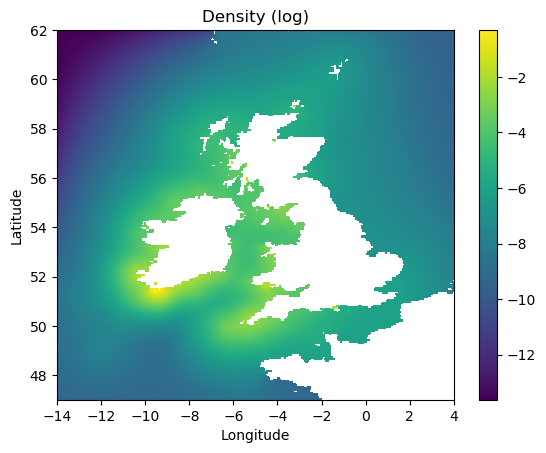

(LCV, LSCV, mean(LHM[1]), mean(LHM[2])) = (-3.737062403531535, -0.16606324446794668, 2.1075916653841937, 1.8245970441469643)


(-3.737062403531535, -0.16606324446794668, 2.1075916653841937, 1.8245970441469643)

In [12]:
@time dens1,LHM,LCV,LSCV= DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0;Ladaptiveiterations=1)

figure()
pcolor(xip,yip,log.(dens1)),colorbar()
xlabel("Longitude")
ylabel("Latitude")
#scatter(xo,yo,s=1,c="white")
title("Density (log)")


@show LCV,LSCV,mean(LHM[1]),mean(LHM[2])

### But how much iterations ? Cross validation indicators can help 

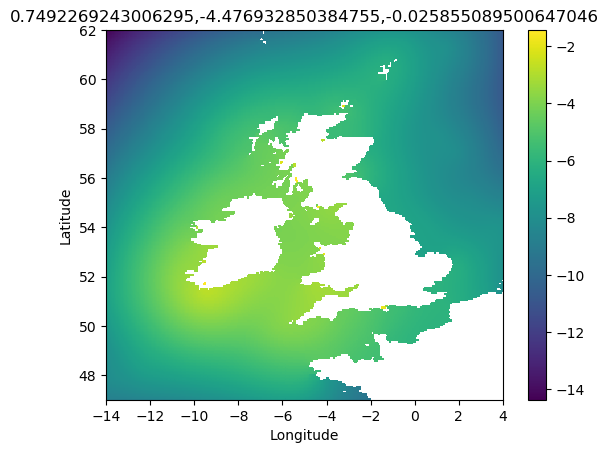

PyObject Text(0.5, 1.0, '0.7492269243006295,-4.476932850384755,-0.025855089500647046')

In [13]:
dens1,LHM,LCV,LSCV= DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0;Ladaptiveiterations=0)
figure()
pcolor(xip,yip,log.(dens1)),colorbar()
xlabel("Longitude")
ylabel("Latitude")
title("$(mean(LHM[1])),$LCV,$LSCV")

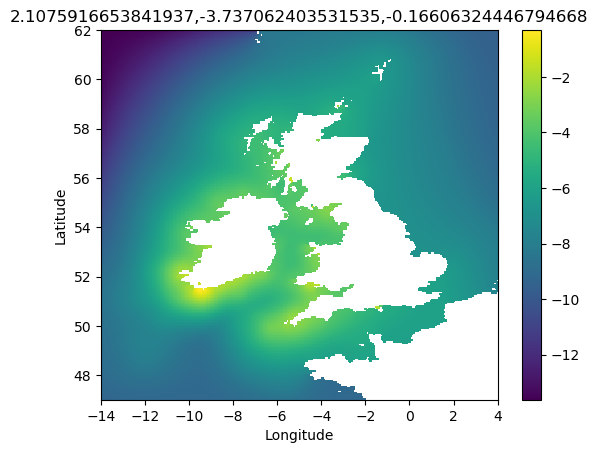

PyObject Text(0.5, 1.0, '2.1075916653841937,-3.737062403531535,-0.16606324446794668')

In [14]:
dens1,LHM,LCV,LSCV= DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0;Ladaptiveiterations=1)
figure()
pcolor(xip,yip,log.(dens1)),colorbar()
xlabel("Longitude")
ylabel("Latitude")
title("$(mean(LHM[1])),$LCV,$LSCV")

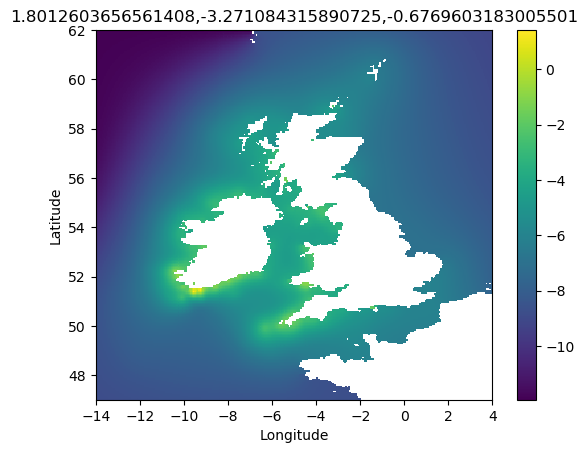

PyObject Text(0.5, 1.0, '1.8012603656561408,-3.271084315890725,-0.6769603183005501')

In [15]:
dens1,LHM,LCV,LSCV= DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0;Ladaptiveiterations=2)
figure()
pcolor(xip,yip,log.(dens1)),colorbar()
xlabel("Longitude")
ylabel("Latitude")
title("$(mean(LHM[1])),$LCV,$LSCV")

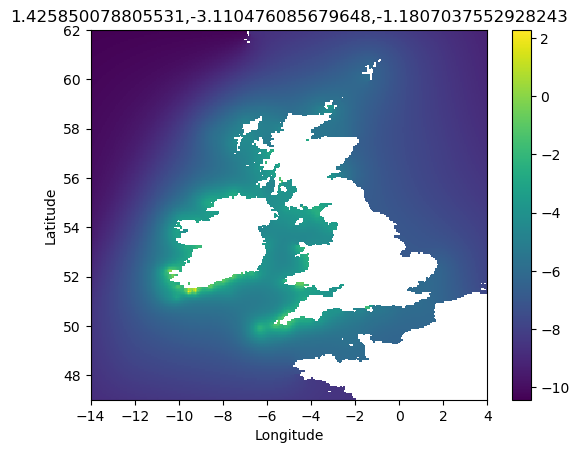

PyObject Text(0.5, 1.0, '1.425850078805531,-3.110476085679648,-1.1807037552928243')

In [16]:
dens1,LHM,LCV,LSCV= DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0;Ladaptiveiterations=3)
figure()
pcolor(xip,yip,log.(dens1)),colorbar()
xlabel("Longitude")
ylabel("Latitude")
title("$(mean(LHM[1])),$LCV,$LSCV")

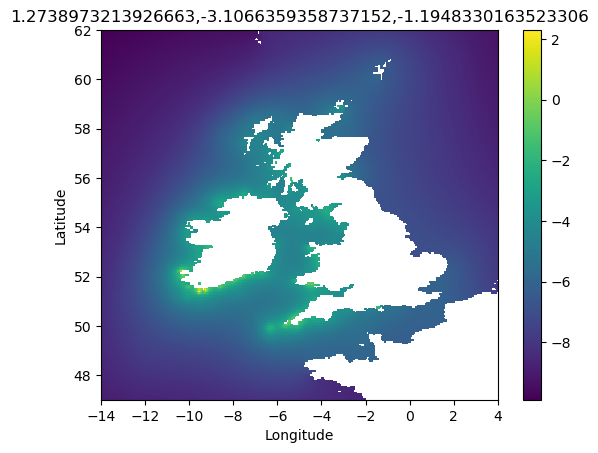

PyObject Text(0.5, 1.0, '1.2738973213926663,-3.1066359358737152,-1.1948330163523306')

In [17]:
dens1,LHM,LCV,LSCV= DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0;Ladaptiveiterations=4)
figure()
pcolor(xip,yip,log.(dens1)),colorbar()
xlabel("Longitude")
ylabel("Latitude")
title("$(mean(LHM[1])),$LCV,$LSCV")

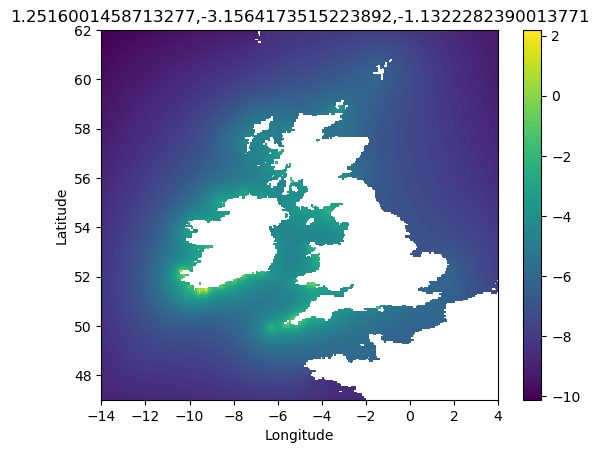

PyObject Text(0.5, 1.0, '1.2516001458713277,-3.1564173515223892,-1.1322282390013771')

In [18]:
dens1,LHM,LCV,LSCV= DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0;Ladaptiveiterations=5)
figure()
pcolor(xip,yip,log.(dens1)),colorbar()
xlabel("Longitude")
ylabel("Latitude")
title("$(mean(LHM[1])),$LCV,$LSCV")

## 4 iterations yield highest likelyhood and lowest rms

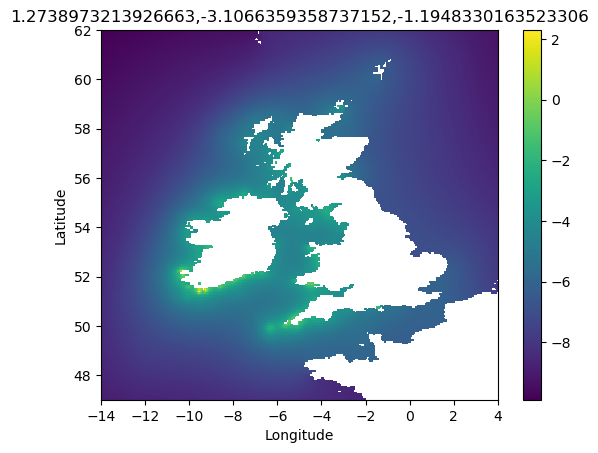

PyObject Text(0.5, 1.0, '1.2738973213926663,-3.1066359358737152,-1.1948330163523306')

In [19]:
dens1,LHM,LCV,LSCV= DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0;Ladaptiveiterations=4)
figure()
pcolor(xip,yip,log.(dens1)),colorbar()
xlabel("Longitude")
ylabel("Latitude")
title("$(mean(LHM[1])),$LCV,$LSCV")

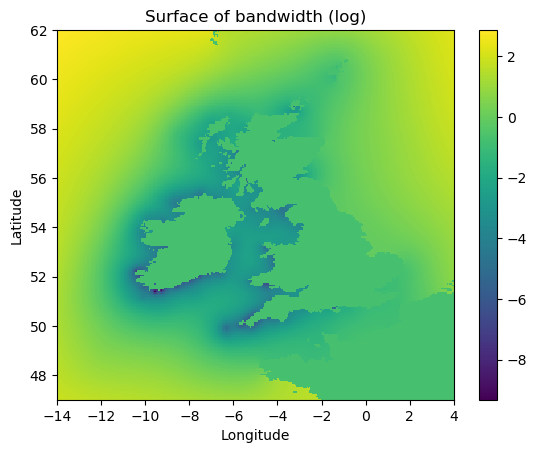

PyObject Text(0.5, 1.0, 'Surface of bandwidth (log)')

In [20]:
pcolor(xip,yip,log.(LHM[1].*LHM[2])),colorbar()
xlabel("Longitude")
ylabel("Latitude")
title("Surface of bandwidth (log)")

# Important note

There is no information used on the effort of looking for turtles. Obviously more are seen close to coastlines because of easier spotting.